##Clase 30/04/2024

### Interpolación

1. Considera $sin(x)$ en el intervalo [−1, 1]. Usando interpolación baricentrica determina el polinomio de tercer orden ($P_3$) y el error $|sin(x) − P_3|$

In [ ]:
from pylab import *
from sympy import *
from IPython.display import Math, Latex
from numpy import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

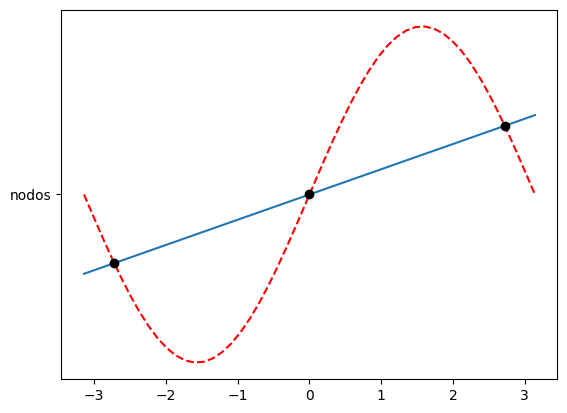

In [ ]:
from scipy.interpolate import barycentric_interpolate
from numpy.polynomial import chebyshev

def f(x):
  return sin(x)

N=3
x=linspace(-pi,pi)

coeffCheb=[0]*3+[1]
T3= chebyshev.Chebyshev(coeffCheb,[-pi,pi])
xp_ch=T3.roots()
fp_ch=f(xp_ch)
y_ch = barycentric_interpolate(xp_ch,fp_ch,x)

plt.plot(x,y_ch)
plt.plot(x,f(x),'--r')
plt.plot(xp_ch,fp_ch,'ok')
plt.plot("nodos")

2. Dada la siguiente tabla y función $f(x) = 3.6/x$

| k | $x_k$ | $f(x_k)$ |
| --- | --- | -------- |
| 0 | 1.0 | 3.600 |
| 1 | 2.0 | 1.80 |
| 2 | 3.0 | 1.20 |
| 3 | 4.0 | 0.90 |
| 4 | 5.0 | 0.72 |


a) Calcula la tabla de diferencias divididas para x=2.5,3.5.

b) Escribe los polinomios interpolados de Newton para P1(x), P2(x), P3(x) y P4(x).

In [ ]:
from itertools import zip_longest
X4=[i+1 for i in range(5)]
f_i =[(3.6/(X4[i])) for i in range(5)]

In [ ]:
f_ii = [(f_i[i+1] - f_i[i]) / (X4[i+1]- X4[i]) for i in range(4)]
f_iii = [(f_ii[i+1] - f_ii[i]) / (X4[i+2]- X4[i]) for i in range(3)]
f_iiii = [(f_iii[i+1] - f_iii[i]) / (X4[i+3]- X4[i]) for i in range(2)]
f_iiiii = [(f_iiii[i+1] - f_iiii[i]) / (X4[i+4]- X4[i]) for i in range(1)]


ffdat1 = pd.DataFrame(list(zip_longest(f_i,f_ii,f_iii,f_iiii, f_iiiii)),
                     index=range(5), columns=["$f(x_i)$", "$Df(x_i)$", "$D^2f(x_i)$","$D^3f(x_i)$","$D^4f(x_i)$"])
ffdat1.insert(0,"$x_i$",X4) # list.insert(index, element)
ffdat1
# ffdat.style.format(dict(xip(ffdat.columns, ["{:3,1f}"] + 5*[partial(nan_sp,fmt="{:7.5f}")])))

$x_i$  $f(x_i)$  $Df(x_i)$  $D^2f(x_i)$  $D^3f(x_i)$  $D^4f(x_i)$
0      1      3.60      -1.80         0.60        -0.15         0.03
1      2      1.80      -0.60         0.15        -0.03          NaN
2      3      1.20      -0.30         0.06          NaN          NaN
3      4      0.90      -0.18          NaN          NaN          NaN
4      5      0.72        NaN          NaN          NaN          NaN

#### Resultado de los polinomios
$P_1(x)=3.6-1.8(x-1)$

$P_2(x)=P_1(x)+0.6(x-1)(x-2)$

$P_3(x)=P_2(x)-0.15(x-1)(x-2)(x-3)$

$P_4(x)=P_3(x)+0.03(x-1)(x-2)(x-3)(x-4)$

In [ ]:
x=2.5
exacto= 3.6/x
print("{:10.8e}".format(exacto))

P={}
#Extraer el primer renglóon de la tabla iloc vive en pandas

r0=ffdat1.iloc(0)[0]

P[1]= r0[1]+r0[2]*(x-1)
P[2]=P[1]+r0[3]*(x-1)*(x-2)
P[3]=P[2]+r0[4]*(x-1)*(x-2)*(x-3)
P[4]=P[3]+r0[5]*(x-1)*(x-2)*(x-3)*(x-4)

PE=dict([(i,exacto-P[i]) for i in range(1,5)])
pd.DataFrame([P,PE], index=["$P_n(x)","Error"])

1.44000000e+00


1     2        3         4
$P_n(x)  0.90  1.35  1.40625  1.423125
Error    0.54  0.09  0.03375  0.016875

In [ ]:
x=3.5
exacto= 3.6/x
print("{:10.8e}".format(exacto))

P={}
#Extraer el primer renglóon de la tabla iloc vive en pandas

r0=ffdat1.iloc(0)[0]

P[1]= r0[1]+r0[2]*(x-1)
P[2]=P[1]+r0[3]*(x-1)*(x-2)
P[3]=P[2]+r0[4]*(x-1)*(x-2)*(x-3)
P[4]=P[3]+r0[5]*(x-1)*(x-2)*(x-3)*(x-4)

PE=dict([(i,exacto-P[i]) for i in range(1,5)])
pd.DataFrame([P,PE], index=["$P_n(x)","Error"])

1.02857143e+00


1         2         3         4
$P_n(x) -0.900000  1.350000  1.068750  1.040625
Error    1.928571 -0.321429 -0.040179 -0.012054

### Integración

1.a Por favor integra analíticamente $$x^2 + sin(3x)$$
de -2 a 2.

1.b Usando el método del trapecio calcula la integral.

1.c Usa el método de Simpson para calcular la misma integral.

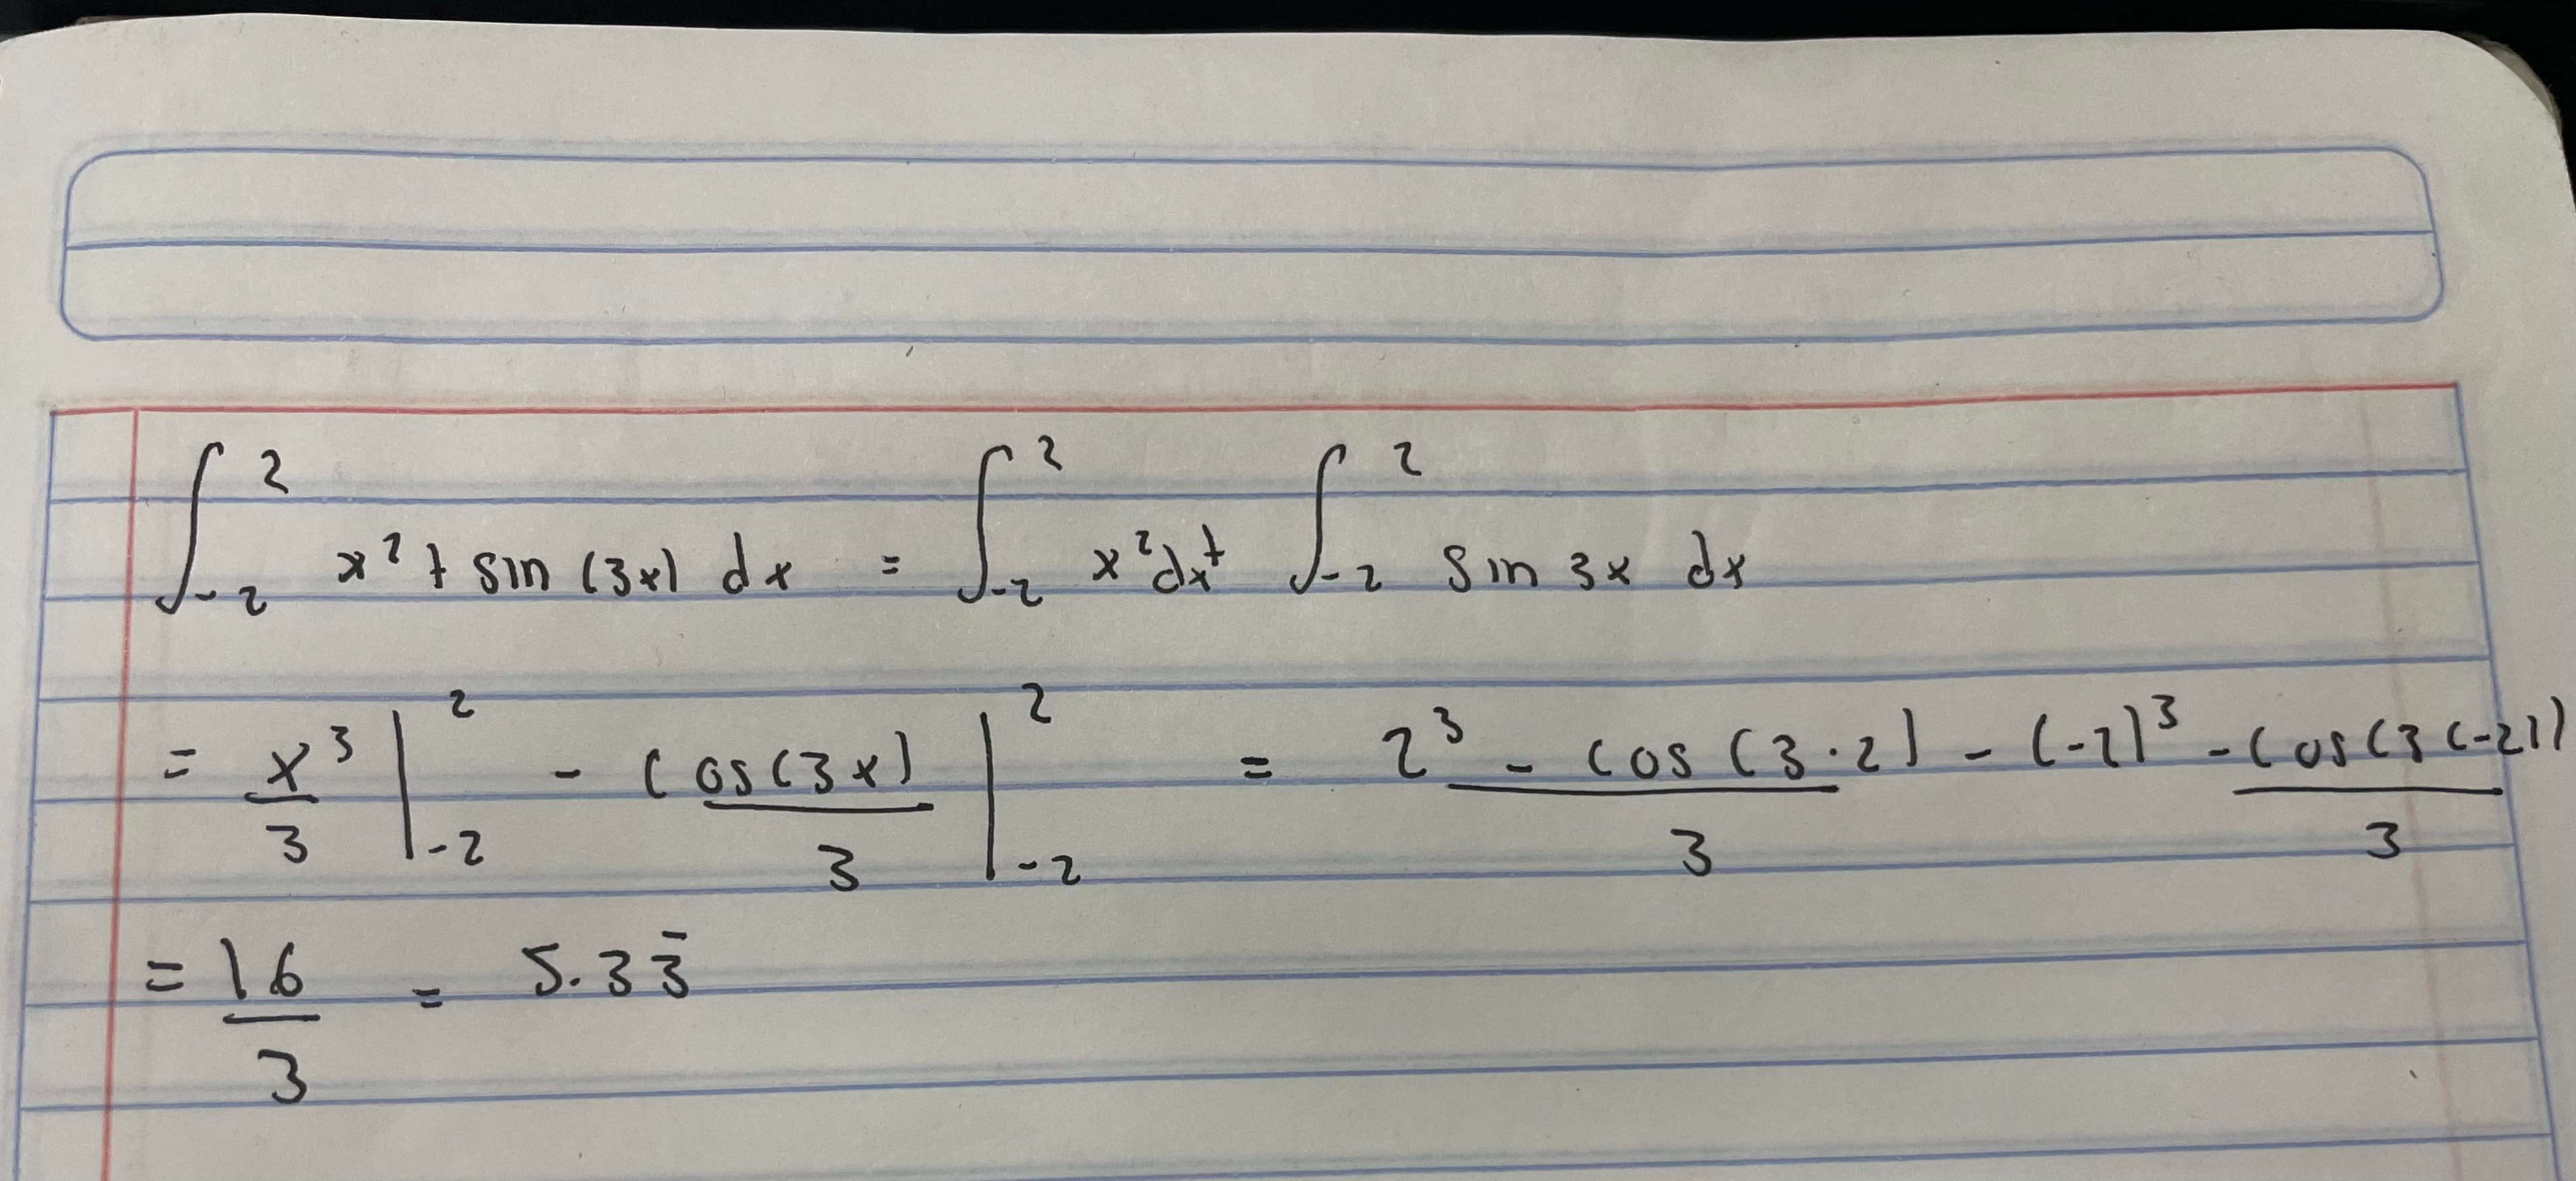

In [ ]:
def simpson(f, a, b, N):
    h = abs(b - a) / N
    s = 0
    s1 = 0
    for i in range(1, N, 2):  # Suma los términos impares
        s += f(a + i * h)
    for j in range(2, N - 1, 2):  # Suma los términos pares
        s1 += f(a + j * h)
    I = h / 3 * (f(a) + f(b) + 4 * s + 2 * s1)
    return I

In [ ]:
funcion=lambda x:x**2+ sin(3*x)
simpson(funcion,-2,2,100)

5.333333333333333

2. Calcula $$\int_{0}^{\pi} sin(x) dx$$ con n = {5, 10, 15, 20, 25} y preséntalo en una tabla bonita. ¿A qué valor tiende?

In [ ]:
f=lambda x: sin(x)


data={'n':[],'Integral Simpson':[],'Error':[]}

for i in [5,10,15,20,25]:
  resultado= simpson(f,0,pi,i)
  data['n'].append(i)
  data['Integral Simpson'].append(resultado)
  valor_real=2
  error=valor_real-resultado
  data['Error'].append(error)

pd.DataFrame(data)

n  Integral Simpson     Error
0   5          1.687555  0.312445
1  10          2.000110 -0.000110
2  15          1.963654  0.036346
3  20          2.000007 -0.000007
4  25          1.986868  0.013132

La integral tiende a un valor de dos unidades.

3. Calcula $$\int_{-1}^{1} \frac{dx}{1+x^2}$$ con n = {5, 10, 15, 20, 25} y preséntalo en una tabla bonita, junto con el error para cada n.

In [ ]:
h=lambda x: 1/(1+x**2)


data={'n':[],'Integral Simpson':[],'Error':[]}

for i in [5,10,15,20,25]:
  resultado= simpson(h,-1,1,i)
  data['n'].append(i)
  data['Integral Simpson'].append(resultado)
  valor_real=pi/2
  error=valor_real-resultado
  data['Error'].append(error)

pd.DataFrame(data)

n  Integral Simpson         Error
0   5          1.294721  2.760754e-01
1  10          1.570795  9.387037e-07
2  15          1.496331  7.446512e-02
3  20          1.570796  1.982529e-08
4  25          1.528045  4.275170e-02

4. Considera $$F(x) = \int_{0}^{x} e^{-t^2} dt$$

a. Calcula F(x) para valores de x de 0 a 3, en incrementos de 0.1.

b. Elige un método para resolver la integral.

c. Grafica F(x).

In [ ]:
g=lambda t: np.exp(-t**2)
x= np.arange(0,3.1,0.1)
resultado1=[simpson(g,0,x,30) for x in x]
pd.DataFrame({'x':x,'F(x)':resultado1})

x      F(x)
0   0.0  0.000000
1   0.1  0.099668
2   0.2  0.197365
3   0.3  0.291238
4   0.4  0.379653
5   0.5  0.461281
6   0.6  0.535154
7   0.7  0.600686
8   0.8  0.657670
9   0.9  0.706242
10  1.0  0.746824
11  1.1  0.780061
12  1.2  0.806745
13  1.3  0.827743
14  1.4  0.843941
15  1.5  0.856188
16  1.6  0.865266
17  1.7  0.871862
18  1.8  0.876559
19  1.9  0.879838
20  2.0  0.882081
21  2.1  0.883586
22  2.2  0.884576
23  2.3  0.885214
24  2.4  0.885617
25  2.5  0.885866
26  2.6  0.886018
27  2.7  0.886108
28  2.8  0.886160
29  2.9  0.886190
30  3.0  0.886207

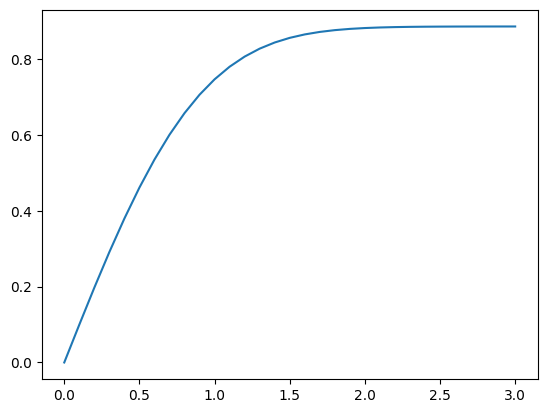

In [ ]:
plt.plot(x, resultado1)